In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

from PIL import Image
import os

In [2]:
df = pd.read_csv('icml_face_data.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

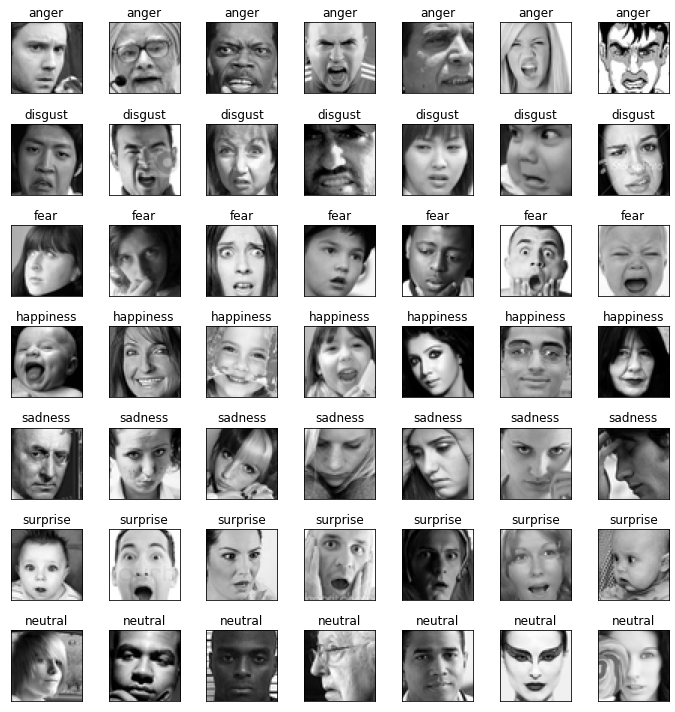

In [4]:
math.sqrt(len(df.pixels[0].split(' ')))

emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
fig = plt.figure(1, (10, 10))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [5]:
df = df.rename(columns={"emotion":"emotion_label"})

In [6]:
emotion = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']
df['emotion'] = df['emotion_label'].apply(lambda x: emotion[int(x)])

In [7]:
display(df)

,emotion_label,Usage,pixels,emotion
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,anger
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...,anger
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...,fear
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,sadness
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,neutral
...,...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,neutral
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...,happiness
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,anger
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,happiness


In [8]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [9]:
df.emotion.value_counts()

happiness    8989
neutral      6198
sadness      6077
fear         5121
anger        4953
surprise     4002
disgust       547
Name: emotion, dtype: int64

C:\Users\Tiffany\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


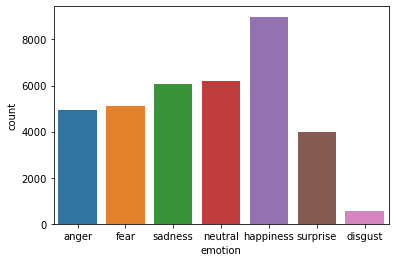

In [10]:
sns.countplot(df.emotion)
plt.show()

In [11]:
interest_labels = [0, 2, 3, 4, 5, 6]
new_df = df[df.emotion_label.isin(interest_labels)]
print(new_df.shape)
display(new_df)

(35340, 4)


,emotion_label,Usage,pixels,emotion
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,anger
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...,anger
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...,fear
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,sadness
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,neutral
...,...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,neutral
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...,happiness
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,anger
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,happiness


C:\Users\Tiffany\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


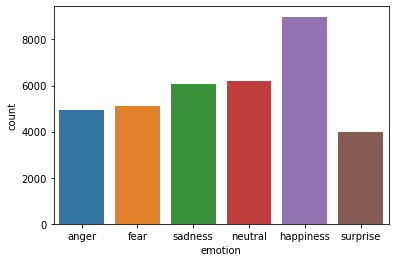

In [12]:
sns.countplot(new_df.emotion)
plt.show()

In [13]:
train_df = new_df[new_df.Usage=="Training"]
validation_df = new_df[new_df.Usage=="PrivateTest"]
test_df = new_df[new_df.Usage=="PublicTest"]
_, train_count = np.unique(train_df.emotion_label, return_counts=True)
_, validation_count = np.unique(validation_df.emotion_label, return_counts=True)
_, test_count = np.unique(test_df.emotion_label, return_counts=True)
count_df = pd.DataFrame(data=(train_count, validation_count, test_count))
count_df = count_df.T
count_df.columns = ['train', 'validation', 'test']
emotion = ['anger', 'fear', 'happiness', 'sadness', 'surprise', 'neutral'] 
count_df['emotion'] = emotion
display(count_df)

,train,validation,test,emotion
0,3995,491,467,anger
1,4097,528,496,fear
2,7215,879,895,happiness
3,4830,594,653,sadness
4,3171,416,415,surprise
5,4965,626,607,neutral


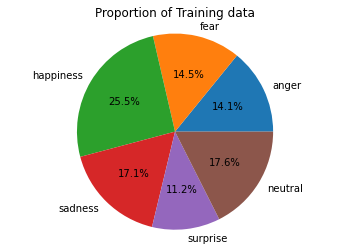

In [14]:
plt.pie(train_count, labels = emotion, autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Proportion of Training data")
plt.show()

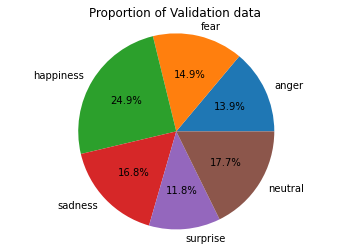

In [15]:
plt.pie(validation_count, labels = emotion, autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Proportion of Validation data")
plt.show()

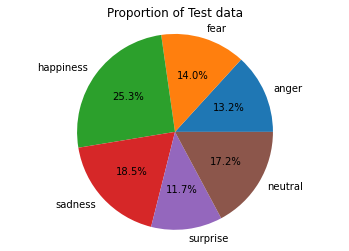

In [16]:
plt.pie(test_count, labels = emotion, autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Proportion of Test data")
plt.show()

In [17]:
new_df.to_csv('face_data.csv', index=False)

In [18]:
def createDir(dir):
    if os.path.exists(dir) is False:
        os.makedirs(dir)

In [19]:
# Convert csv to images
def saveImage(file):
    faces_data = pd.read_csv(file)
    imageCount = 0
    for index in range(len(faces_data)):
        emotion_data = faces_data.loc[index][0]
        usage_data = faces_data.loc[index][1]
        image_data = faces_data.loc[index][2]
        
        # change image_data to 48*48
        data_array = list(map(float, image_data.split()))
        data_array = np.asarray(data_array)
        image = data_array.reshape(48, 48)
        
        dirName = usage_data
        emotionName = emotion_label_to_text[(emotion_data)]
        
        # Create folder to save images 
        imagePath = os.path.join(dirName, emotionName)
        
        createDir(dirName)
        createDir(imagePath)
        
        imageName = os.path.join(imagePath, str(index) + '.jpg')

        Image.fromarray(image).convert('L').save(imageName)
        
        imageCount += 1
    print('Total: ' + str(imageCount) + ' images')        

In [20]:
saveImage('face_data.csv')

Total: 35340 images
